# PROJECT -1 :- Neural Networks & Deep Learning 
Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

Dataset used = bank.csv
Link to the Kaggle project site:

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [107]:
#Import the required packages
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(42) #This is the latest command for tensorflow 2.0 to set randpm seed

In [108]:
#Checking the TensorFlow Version
tf.__version__

'2.0.0'

In [109]:
#Importing Keras from tensorflow & Subsequent models that is required . 
from tensorflow import keras

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [111]:
from tensorflow.keras import backend as K

In [112]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# importing mat-plot lib 
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [113]:
tf.__version__

'2.0.0'

##### 1.Read the dataset

In [114]:
#Importing the bank.csv dataset into df_bank
df_bank = pd.read_csv("bank.csv")

In [115]:
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 2. Drop the columns which are unique for all users like IDs (2.5 points)

###### Upon analysing the datasets the below columns

1.) RowNumber
2.) CustomerId
3.) Surname 
are some of the unique customer attributes and not useful for modeling

In [116]:
df_bank =df_bank.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [117]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
df_bank.shape

(10000, 11)

In [119]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [120]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [121]:
#No missing Values in the columns are found
df_bank.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Finding Unique Values in the columns

In [122]:
df_bank['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [123]:
df_bank['Exited'].unique()

array([1, 0], dtype=int64)

In [124]:
df_bank['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [125]:
#Understanding the count of unique values
df_bank['Geography'].value_counts()
df_bank['Exited'].value_counts()
df_bank['Gender'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

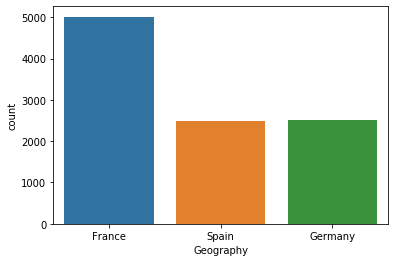

In [126]:
# Plotting count of Geography
sns.countplot(data=df_bank , x='Geography')
plt.show()

In [127]:
#Giving weights to Geography by replacing France to 0 & Spain to 1 & Germany to 2
df_bank['Geography'] = df_bank['Geography'].replace({'France': 0,'Spain': 1, 'Germany' : 2})

In [128]:
df_bank['Geography'].value_counts()

0    5014
2    2509
1    2477
Name: Geography, dtype: int64

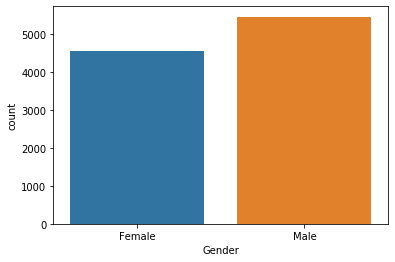

In [129]:
# Plotting count of Gender
sns.countplot(data=df_bank , x='Gender')
plt.show()

In [130]:
#Giving weights to Gender Male & Female by replacing Male to 0 & Female to 1 
df_bank['Gender'] = df_bank['Gender'].replace({'Male': 0,'Female': 1})

In [131]:
df_bank['Gender'].value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

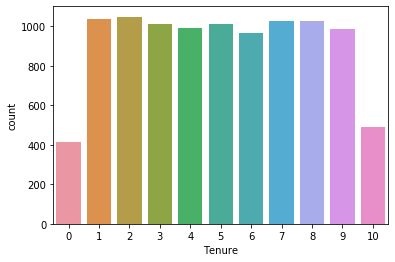

In [132]:
# Plotting count of NumOfProducts
sns.countplot(data=df_bank , x='Tenure')
plt.show()

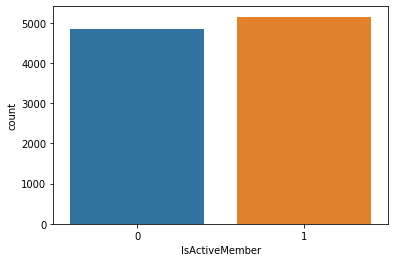

In [133]:
# plotting count of IsActiveMember
sns.countplot(data=df_bank , x='IsActiveMember')
plt.show()

In [134]:
#Attribute: "CreditScore", "Balance", "EstimatedSalary"
#These are continuous numeric values, perform histogram and boxplot analysis
num_cols = ["CreditScore", "Balance", "EstimatedSalary"]

##### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020861D85CC0>,
      dtype=object)

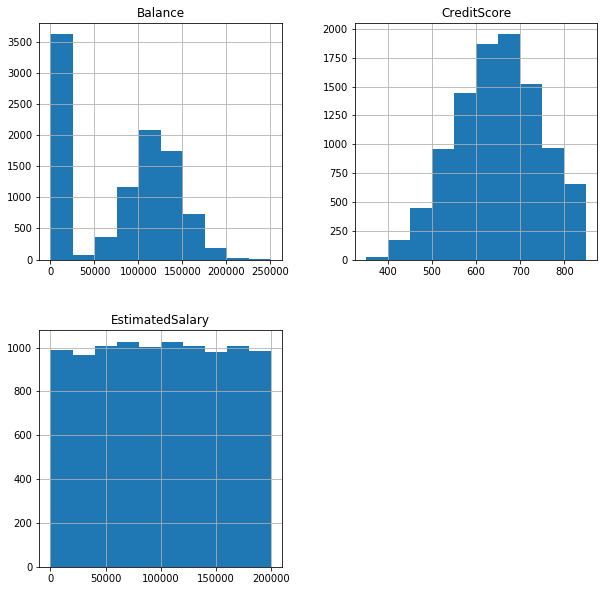

In [135]:
# Univariant analysis by generating histogram 
df_bank[num_cols].hist(figsize = [10,10])

##### BoxPlot

CreditScore           AxesSubplot(0.125,0.125;0.227941x0.755)
Balance            AxesSubplot(0.398529,0.125;0.227941x0.755)
EstimatedSalary    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

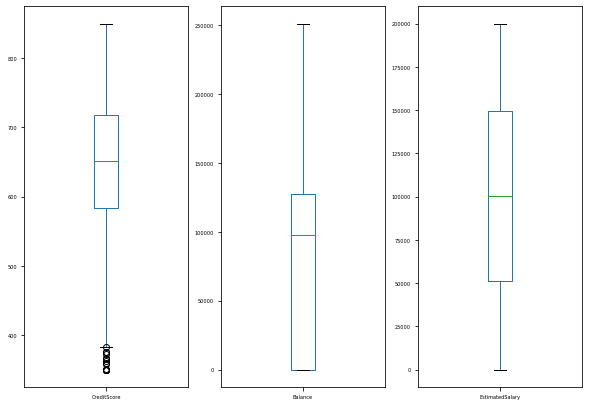

In [146]:
df_bank[num_cols].plot(kind='box', subplots=True, layout=(1,3), fontsize=5, figsize=(10,7))
plt.show()

In [148]:
#The above BoxPlot gives us a clear picture of the outlier present in CreditScore. Hence we need to remove the outliers present.
# Creating a function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df[colname] = df[colname].apply(lambda x: lb if x < lb else x)

In [150]:
df_bank_treated = df_bank.copy(deep = True)  # make copy of orignal dataframe

# outlier treatment for "CreditScore"
treat_lower_outliers(df_bank_treated, "CreditScore")

CreditScore           AxesSubplot(0.125,0.125;0.227941x0.755)
Balance            AxesSubplot(0.398529,0.125;0.227941x0.755)
EstimatedSalary    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

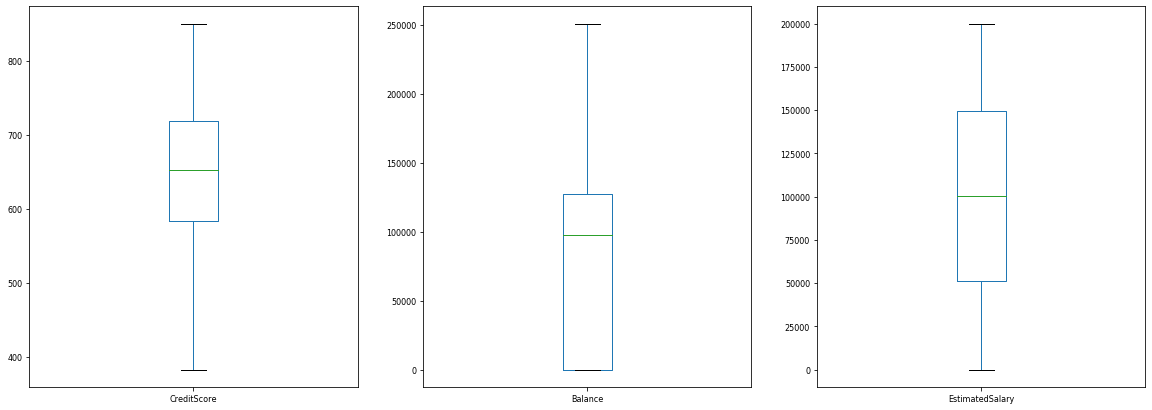

In [152]:
df_bank_treated[num_cols].plot(kind='box', subplots=True, layout=(1,3), fontsize=8, figsize=(20,7))
plt.show()

##### If you see the above BoxPlot the lower outliers present have been removed successfully. 

##### Bivariant analysis Using PairPlot

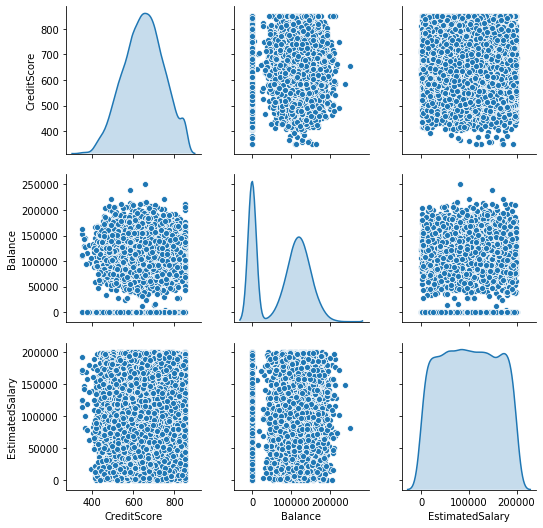

In [137]:
sns.pairplot(df_bank[num_cols], diag_kind="kde")

In [138]:
#From the above pairplot we can notice that there are specific % of accounts that have ZERO balance. 
bal_zero = len(df_bank[df_bank["Balance"]==0])/df_bank.shape[0]
print("% of dataset having zero balance: ", bal_zero)

% of dataset having zero balance:  0.3617


##### Understanding the relationship between one variable to other using HeatMap

In [142]:
df_bank.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008267,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.008267,1.000000,0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
Gender,0.002857,0.016936,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,-0.003965,0.048092,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.001418,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.348700,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.006180,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.004036,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,-0.012692,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,0.007382,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20862b0f710>)

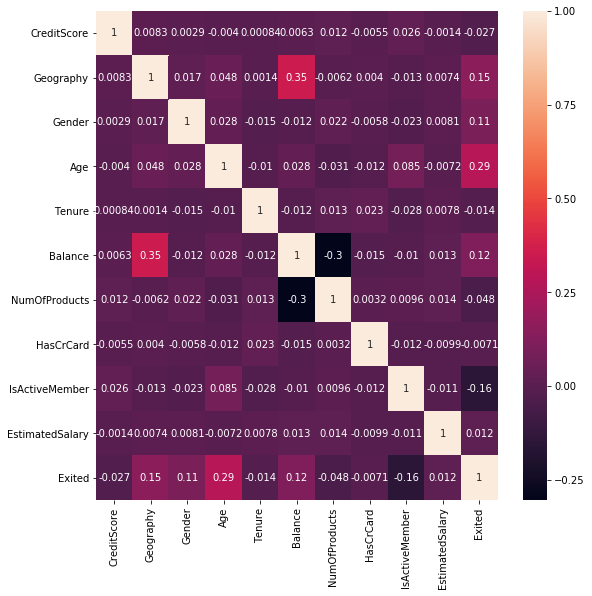

In [145]:
plt.subplots(figsize = (9,9))
sns.heatmap(df_bank.corr(), annot=True)

# Summary of Things :- 

a.Following attributes dropped from analysis: 
1.) RowNumber 
2.) CustomerId 
3.) Surname

b. Observation made on categorical attributes "Geography", "Gender", "Tenure", "IsActiveMember" using sns plot. 

c. "Geography", "Gender" are non-numeric data categorical attribute and hence were converted into numerical form. 

d. Observations made on continuous attributes "CreditScore", "Balance", "EstimatedSalary" using BoxPlot

e. Lower Outliers were handled on "CreditScore" attribute . 

In [153]:
#One-Hot Encoding
category_attrs=["Geography", "Gender", "Tenure","NumOfProducts", "HasCrCard", "IsActiveMember"]
df_bank_treated = pd.get_dummies(df_bank_treated, columns=category_attrs)

In [156]:
print("Shape: ", df_bank_treated.shape)
df_bank_treated.head()

Shape:  (10000, 29)


,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619.0,42,0.00,101348.88,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1,608.0,41,83807.86,112542.58,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,502.0,42,159660.80,113931.57,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,699.0,39,0.00,93826.63,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,850.0,43,125510.82,79084.10,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1


##### 3. Distinguish the Feature and Target set 

In [157]:
df_target = df_bank[["Exited"]]
df_features = df_bank.drop(labels="Exited",axis=1)

In [158]:
df_features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


##### 4. Divide the data set into Train and test sets

In [159]:
#Taking 70:30 training and test set
test_size = 0.30 
seed = 10  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=seed)

In [160]:
#Training dataset shape
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (7000, 10)
Y_train:  (7000, 1)


In [161]:
#Testing dataet shape
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_test:  (3000, 10)
Y_test:  (3000, 1)


##### 5. Normalize the train and test data

In [168]:
# Transform the entire independent variable data to ZScore through transformation.
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)

##### 6. Initialize & build the model

In [182]:
#Initialize Sequential model
model = keras.models.Sequential()
model.add(keras.layers.BatchNormalization(input_shape=(X_train_std.shape[1],)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [187]:
#Compile the model --> backpropagation -> gradient descent
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [189]:
#Converting the labels to arrays before calling model.fit()
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

In [190]:
model.fit(X_train_std, Y_train, 
          validation_data=(X_test_std, Y_test), 
          epochs=30,
          batch_size=10)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 5s 738us/sample - loss: 0.6266 - accuracy: 0.6914 - val_loss: 0.5202 - val_accuracy: 0.7687
Epoch 2/30
7000/7000 [==============================] - 2s 303us/sample - loss: 0.4768 - accuracy: 0.7887 - val_loss: 0.4768 - val_accuracy: 0.7807
Epoch 3/30
7000/7000 [==============================] - 3s 407us/sample - loss: 0.4471 - accuracy: 0.8013 - val_loss: 0.4587 - val_accuracy: 0.7910
Epoch 4/30
7000/7000 [==============================] - 3s 407us/sample - loss: 0.4392 - accuracy: 0.8063 - val_loss: 0.4518 - val_accuracy: 0.7960
Epoch 5/30
7000/7000 [==============================] - 3s 411us/sample - loss: 0.4307 - accuracy: 0.8120 - val_loss: 0.4480 - val_accuracy: 0.8000
Epoch 6/30
7000/7000 [==============================] - 2s 241us/sample - loss: 0.4263 - accuracy: 0.8169 - val_loss: 0.4470 - val_accuracy: 0.8003
Epoch 7/30
7000/7000 [==============================] - 2s 241us

In [192]:
#Test Accuracy
test_loss1, test_acc1 = model.evaluate(X_test_std, Y_test)
print('\nTest accuracy:[Without Any layer]: %0.2f' %(test_acc1*100))

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy:[Without Any layer]: 79.93


##### 7. Predict the results using 0.5 as a threshold

In [195]:
# Predict The Model
y_predict = model.predict(X_test_std)
y_predict

array([[0.34135723],
       [0.33107623],
       [0.49181286],
       ...,
       [0.13250539],
       [0.09892008],
       [0.10803849]], dtype=float32)

In [197]:
# Threshold = 0.5
y_predict = (y_predict > 0.5)
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

##### 8. Print the Accuracy score and confusion matrix

In [202]:
#Accuracy Score
from sklearn import metrics
acc = metrics.accuracy_score(Y_test,y_predict)
print('\nTest accuracy: %0.2f' %(acc*100))


Test accuracy: 79.93


In [203]:
#Confusion Matrix
print("Confusion matrix:")
metrics.confusion_matrix(Y_test, y_predict)

Confusion matrix:


array([[2268,  112],
       [ 490,  130]], dtype=int64)